#Colab Mode
impoer libarary
connect gdrive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


#import library

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import os
from glob import glob

In [ ]:
  #in linux
# tumor_dir="/mnt/a/dmsdl/TIPS/RM/DATA/tumor/"
# normal_dir="/mnt/a/dmsdl/TIPS/RM/DATA/normal/"
# base_dir="/mnt/a/dmsdl/TIPS/RM/DATA/"

%cd "/content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/" 
 #%pwd   #!unzip "files.zip" 
%ls -lSh

#%mkdir "normal_train" "normal_test" "normal_validation" "tumor_train" "tumor_test" "tumor_validation"

#%cp -r "tumor" "tumor_train" "tumor_test" "tumor_validation"
#%cp -r "/content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/files_ori" "/content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/"

/content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL
total 24M
-rw------- 1 root root  21M Dec 25 13:49  files.zip
-rw------- 1 root root 2.2M Jan  6 00:16  seperIMG_notM02.ipynb
-rw------- 1 root root 355K Jan  3 08:45 'seperIMG_notM01(0103).ipynb'
-rw------- 1 root root  83K Jan  1 15:36  seperIMG03.ipynb
-rw------- 1 root root  75K Dec 28 10:52  seperIMG02.ipynb
-rw------- 1 root root  69K Jan  5 00:30  seperIMG_MV01_0104.ipynb
-rw------- 1 root root  57K Jan  3 05:13  seperIMG_b.ipynb
-rw------- 1 root root 5.8K Dec 25 12:50  seperIMG01.ipynb
drwx------ 2 root root 4.0K Dec 22 05:47  normal/
drwx------ 2 root root 4.0K Dec 28 10:02  result/
drwx------ 2 root root 4.0K Dec 27 04:55  test/
drwx------ 2 root root 4.0K Jan  3 07:10  testt/
drwx------ 2 root root 4.0K Dec 27 04:55  train/
drwx------ 2 root root 4.0K Jan  3 07:10  traint/
drwx------ 2 root root 4.0K Dec 25 14:01  tumor/
drwx------ 2 root root 4.0K Jan  3 05:51  tvalidation_ori/
drwx------ 2 root root 4.0K Dec 27 04:56  v

#Data setting

In [ ]:
import shutil#이미 실행 시킴_초기화 구현 전에는 수행하지 말 것
import random

#img file directory
#/content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/normal_train
base_dir="/content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/"
#abour unzip img
tumor_dir=base_dir+"tumor/"
normal_dir=base_dir+"normal/"
validation_dir=base_dir+"validation/"

# tumor_img = os.path.join(base_dir,'tumor')
# noraml_img = os.path.join(base_dir,'noraml')

tm_list=os.listdir(tumor_dir)
nm_list=os.listdir(normal_dir)
vm_list=os.listdir(validation_dir)

def img_mv(b_dir,dir_name,list_name):#정리 하기
  #clear 
  if len((os.listdir(dir_name)))==0:
    #insert
    for fn in list_name:
      #b_dir=b_dir+fn
      print('b_dir :',b_dir+fn, "dir_name :",dir_name,'\n')
      print("fn:",fn)
      shutil.copy(b_dir+fn,dir_name)#copy file
  #else: #delete file and remake

#   print("rm data file_reset")
#   shutil.rmtree(dir_name)
#   img_mv(b_dir,dir_name,list_name)

In [ ]:
#mapping data
train_dir = os.path.join(base_dir, 'train/')
validation_dir = os.path.join(base_dir, 'validation/')
test_dir = os.path.join(base_dir, 'test/')
#just check up
# print(validation_dir)
# print(test_dir)

#print("noraml_train :",len(os.listdir(noraml_train)))
#print("tumor_validation :",len(os.listdir(tumor_validation)))
#print("normal_test :",len(os.listdir(normal_test)))

In [ ]:
# print("validation_dir :",validation_dir)#print("train_dir : ",train_dir)
# print("test :",validation_dir[-11:])

validation_dir : /content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/validation/
test : validation/


#Data Modeling

In [ ]:
#데이터 분활(지금은 삭제하는거 안만들어 둠)
#tr:vl:te=6:2:2  #image size (128, 128)

# tr_list=random.sample(tm_list,int(len(os.listdir(tumor_dir))*0.6))
# img_mv(tumor_dir,base_dir+"tumor_train/",tr_list)
# nr_list=random.sample(nm_list,int(len(os.listdir(normal_dir))*0.6))
# img_mv(normal_dir,base_dir+"normal_train/",nr_list)

# tt_list=random.sample(tm_list,int(len(os.listdir(tumor_dir))*0.2))
# img_mv(tumor_dir,base_dir+"tumor_test/",tt_list)
# nt_list=random.sample(nm_list,int(len(os.listdir(normal_dir))*0.2))
# img_mv(normal_dir,base_dir+"normal_test/",nt_list)

# tv_list=random.sample(tm_list,int(len(os.listdir(tumor_dir))*0.2))
# img_mv(tumor_dir,base_dir+"validation/"+"tumor_validation/",tv_list)
# nv_list=random.sample(nm_list,int(len(os.listdir(normal_dir))*0.2))
# img_mv(normal_dir,base_dir+"validation/"+"normal_validation/",nv_list)


# import pandas as pd
# import os

# base_dir="/content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/"
# index_n=["TRY_t","Epochs","Batch_size","Steps_per_epoch","Loss","Accuracy","File_list"]#index_n=list()
# print("index_n",len(index_n))
# value_d=["try_t","epochs","batch_size","steps_per_epoch","Accuracy","Train_list","Validation_list"]
# print("value_d",len(value_d))
# # index_n 7
# # value_d 6

# for (path, dir, file) in os.walk(base_dir):
#   # if(len(dir)==2):
#   #   if(path[-10:]=="validation"):
#   #     print("Working")
#   #   elif(path[-5:]=="train"):
#   #      print("train")

#     if(len(dir)==2):
#       if(path[-10:]=="validation"):
# #         dfv=pd.DataFrame(value_d,columns=index_n)
#           dfv=pd.DataFrame(value_d,columns=index_n)
#           print("validation //",dfv)
 

b_dir : /content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/tumor/13-1_0.5x_109.jpg dir_name : /content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/validation/tumor_validation/ 

fn: 13-1_0.5x_109.jpg
b_dir : /content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/tumor/5-1_0.4x_50.jpg dir_name : /content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/validation/tumor_validation/ 

fn: 5-1_0.4x_50.jpg
b_dir : /content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/tumor/35-1_0.6x_152.jpg dir_name : /content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/validation/tumor_validation/ 

fn: 35-1_0.6x_152.jpg
b_dir : /content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/tumor/50-1_0.5x_91.jpg dir_name : /content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/validation/tumor_validation/ 

fn: 50-1_0.5x_91.jpg
b_dir : /content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/tumor/9-2_0.5x_171.jpg dir_name : /content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/validation/tumor_validation/ 

fn: 9-2_0.5x_171.jp

#test modeling01(사용 X)

In [ ]:
#just check up
# print(tumor_img)     # print(normal_img)
# print("tumor_img :",len(os.listdir(tumor_img)))
# print("normal_img :",len(os.listdir(normal_img)))
    # tumor_img : 2507     # normal_img : 1791
# print("tumor_validation :",len(os.listdir(base_dir+"tumor_validation")))
# print("normal_validation :",len(os.listdir(base_dir+"normal_validation")))
    # #image=Image.open(tumor_dir+"10-1_0.4x_111.jpg")
    # print("image size",image.size)#image size (128, 128)    
#tr:vl:te=6:2:2  #(지금은 임의로 옮겨두는 걸로)
    
# img_size=128#이는 확인된것
#     #CNN modeling
# model = tf.keras.models.Sequential([
#       tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
#       tf.keras.layers.MaxPooling2D(2,2),
#       tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#       tf.keras.layers.MaxPooling2D(2,2),
#       tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#       tf.keras.layers.MaxPooling2D(2,2),

#       tf.keras.layers.Flatten(),

#       tf.keras.layers.Dense(512, activation='relu'),#,kernel_initializer='random_normal'
#       tf.keras.layers.Dense(1, activation='sigmoid') ])   
# print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

#test modeling02(1/5)
- https://www.researchgate.net/publication/344866014_Automated_Binary_Classification_of_Diabetic_Retinopathy_by_Convolutional_Neural_Networks
res --> acc는 오히려 떨어지고0.4 loss는 증가0.6 & 그리고 학습을 진행 시켜도 일정 편차에서 왔다갔다 하는 수준.

이 또한 전처리 수행 후 작업되어 있으므로 돌려본 이후 전처리 여부 다시 생각해보는 것으로

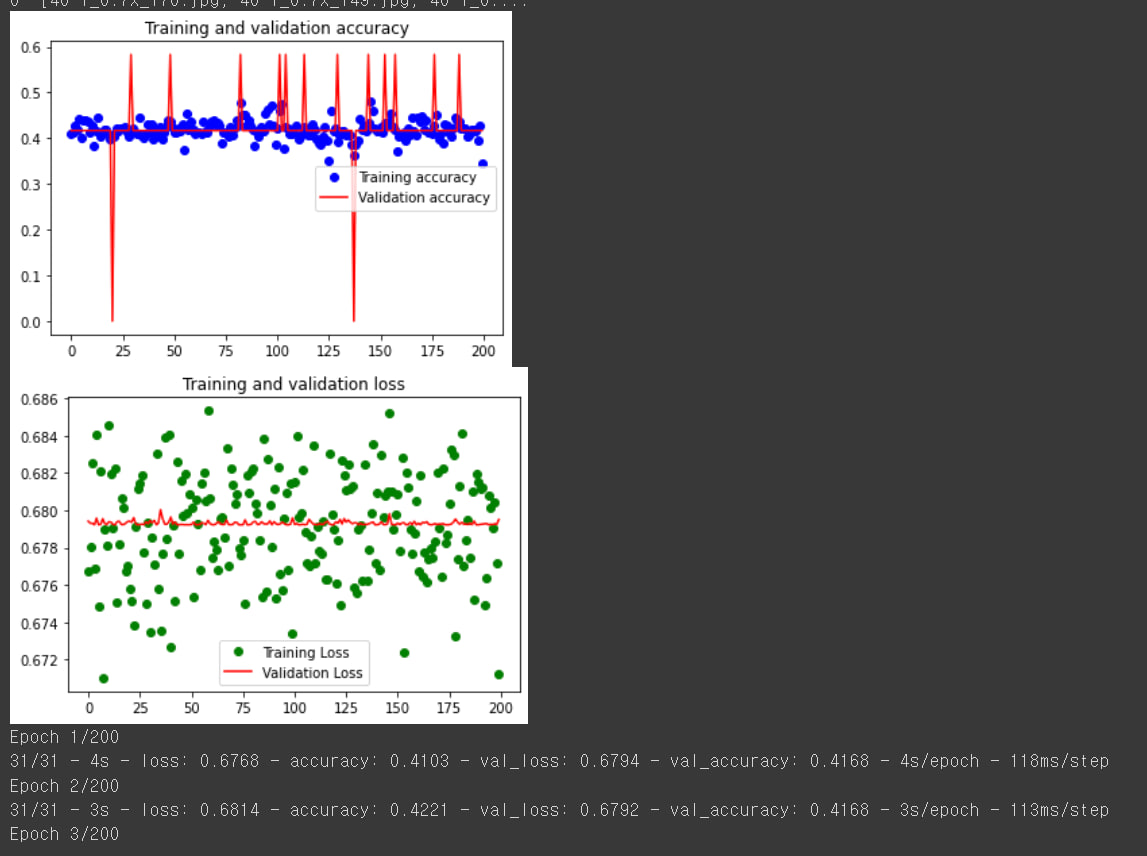

In [ ]:
from tensorflow.keras.layers import Dense

img_size=128#이는 확인된것
    #CNN modeling
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
      tf.keras.layers.Dropout(0.5),#add
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(128, (3,3), activation='relu')]) 
      # tf.keras.layers.MaxPooling2D(2,2),
      # tf.keras.layers.Dropout(0.6, noise_shape=None, seed=None),
      # tf.keras.layers.Flatten(),
      # #tf.keras.layers.Dense(512, activation='relu'),#,kernel_initializer='random_normal'
      # tf.keras.layers.Dense(1, activation='softmax') 
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=3, activation='sigmoid'))
model.add(tf.keras.layers.Flatten())
# model compile: 
model.compile(loss='binary_crossentropy', optimizer='adam')

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

#test modeling03(0105)

In [ ]:
from tensorflow.keras.layers import Dense

img_size=128#이는 확인된것
    #CNN modeling
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
      tf.keras.layers.Dropout(0.5),#add
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(128, (3,3), activation='relu')]) 
      # tf.keras.layers.MaxPooling2D(2,2),
      # tf.keras.layers.Dropout(0.6, noise_shape=None, seed=None),
      # tf.keras.layers.Flatten(),
      # #tf.keras.layers.Dense(512, activation='relu'),#,kernel_initializer='random_normal'
      # tf.keras.layers.Dense(1, activation='softmax') 
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=3, activation='sigmoid'))
model.add(tf.keras.layers.Flatten())
# model compile: 
model.compile(loss='binary_crossentropy', optimizer='adam')

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [ ]:
!pip install callee#for excuse error
#https://jsp-dev.tistory.com/entry/Python-Exception-%EB%B0%9C%EC%83%9D%EC%8B%9C-%ED%95%B4%EB%8B%B9-%EC%86%8C%EC%8A%A4-%EB%9D%BC%EC%9D%B8-%EC%B6%9C%EB%A0%A5%ED%95%98%EA%B8%B0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for callee: filename=callee-0.3.1-py3-none-any.whl size=23341 sha256=9ba7eeebed09b95c20b4984132abdd5d95d7e34e8b9ec020179e9be3bf956848
  Stored in directory: /root/.cache/pip/wheels/d5/98/06/ba49c74b8dac4d96cde6d7108dfb2ba33bd12d2bbcf269c77a
Successfully built callee


In [ ]:
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#model complie
model.compile(optimizer=RMSprop(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])
img_size=128 
#img pre
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
            batch_size=50,  class_mode='binary',target_size=(img_size, img_size))
validation_generator = test_datagen.flow_from_directory(validation_dir,
            batch_size=50, class_mode='binary',target_size=(img_size, img_size))
#test_datagen
test_generator = test_datagen.flow_from_directory(test_dir,
            batch_size=50, class_mode='binary',target_size=(img_size, img_size))

Found 2578 images belonging to 2 classes.
Found 859 images belonging to 2 classes.
Found 859 images belonging to 2 classes.


Epoch 1/200
30/30 - 4s - loss: 0.6768 - accuracy: 0.4087 - val_loss: 0.6794 - val_accuracy: 0.4168 - 4s/epoch - 121ms/step
Epoch 2/200
30/30 - 4s - loss: 0.6781 - accuracy: 0.4127 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 135ms/step
Epoch 3/200
30/30 - 4s - loss: 0.6825 - accuracy: 0.4263 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 129ms/step
Epoch 4/200
30/30 - 4s - loss: 0.6769 - accuracy: 0.4195 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 119ms/step
Epoch 5/200
30/30 - 4s - loss: 0.6841 - accuracy: 0.4433 - val_loss: 0.6796 - val_accuracy: 0.4168 - 4s/epoch - 122ms/step
Epoch 6/200
30/30 - 3s - loss: 0.6748 - accuracy: 0.4019 - val_loss: 0.6792 - val_accuracy: 0.4168 - 3s/epoch - 116ms/step
Epoch 7/200
30/30 - 4s - loss: 0.6821 - accuracy: 0.4393 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 120ms/step
Epoch 8/200
30/30 - 4s - loss: 0.6710 - accuracy: 0.4384 - val_loss: 0.6795 - val_accuracy: 0.4168 - 4s/epoch - 121ms/step
Epoch 9/200
30/3

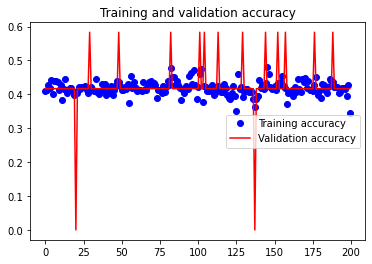

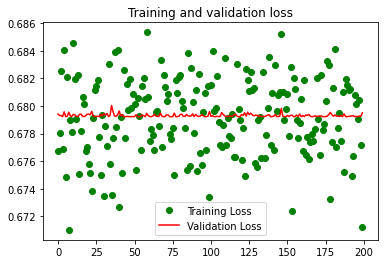

Epoch 1/200
31/31 - 4s - loss: 0.6768 - accuracy: 0.4103 - val_loss: 0.6794 - val_accuracy: 0.4168 - 4s/epoch - 118ms/step
Epoch 2/200
31/31 - 3s - loss: 0.6814 - accuracy: 0.4221 - val_loss: 0.6792 - val_accuracy: 0.4168 - 3s/epoch - 113ms/step
Epoch 3/200
31/31 - 4s - loss: 0.6818 - accuracy: 0.4234 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 116ms/step
Epoch 4/200
31/31 - 4s - loss: 0.6811 - accuracy: 0.4241 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 116ms/step
Epoch 5/200
31/31 - 4s - loss: 0.6806 - accuracy: 0.4051 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 127ms/step
Epoch 6/200
31/31 - 4s - loss: 0.6792 - accuracy: 0.4005 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 132ms/step
Epoch 7/200
31/31 - 4s - loss: 0.6780 - accuracy: 0.3462 - val_loss: 0.6793 - val_accuracy: 0.0000e+00 - 4s/epoch - 116ms/step
Epoch 8/200
31/31 - 4s - loss: 0.6747 - accuracy: 0.3560 - val_loss: 0.6795 - val_accuracy: 0.4168 - 4s/epoch - 117ms/step
Epoch 9/200


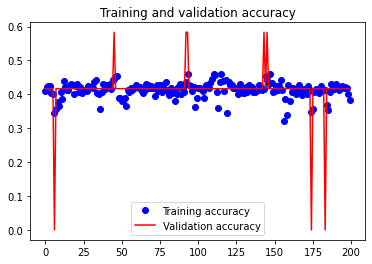

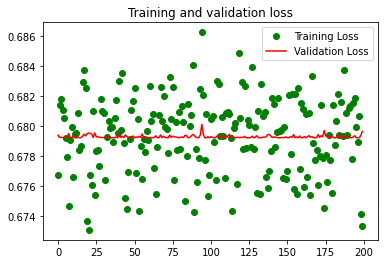

Epoch 1/200
32/32 - 4s - loss: 0.6771 - accuracy: 0.4468 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 120ms/step
Epoch 2/200
32/32 - 4s - loss: 0.6773 - accuracy: 0.4106 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 116ms/step
Epoch 3/200
32/32 - 4s - loss: 0.6820 - accuracy: 0.4244 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 129ms/step
Epoch 4/200
32/32 - 4s - loss: 0.6784 - accuracy: 0.4132 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 121ms/step
Epoch 5/200
32/32 - 4s - loss: 0.6767 - accuracy: 0.4125 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 118ms/step
Epoch 6/200
32/32 - 4s - loss: 0.6809 - accuracy: 0.4450 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 116ms/step
Epoch 7/200
32/32 - 4s - loss: 0.6815 - accuracy: 0.4556 - val_loss: 0.6794 - val_accuracy: 0.4168 - 4s/epoch - 115ms/step
Epoch 8/200
32/32 - 4s - loss: 0.6821 - accuracy: 0.4650 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 115ms/step
Epoch 9/200
32/3

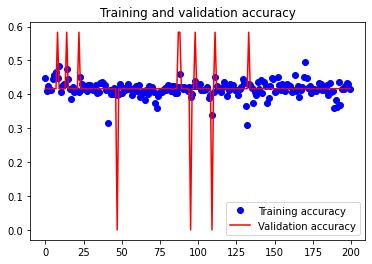

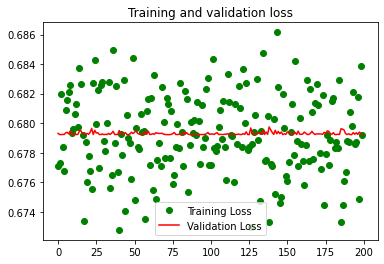

Epoch 1/200
33/33 - 4s - loss: 0.6757 - accuracy: 0.4533 - val_loss: 0.6794 - val_accuracy: 0.4168 - 4s/epoch - 118ms/step
Epoch 2/200
33/33 - 4s - loss: 0.6797 - accuracy: 0.4423 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 118ms/step
Epoch 3/200
33/33 - 4s - loss: 0.6770 - accuracy: 0.4079 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 116ms/step
Epoch 4/200
33/33 - 4s - loss: 0.6825 - accuracy: 0.4255 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 131ms/step
Epoch 5/200
33/33 - 4s - loss: 0.6770 - accuracy: 0.4097 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 118ms/step
Epoch 6/200
33/33 - 4s - loss: 0.6784 - accuracy: 0.4066 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 114ms/step
Epoch 7/200
33/33 - 4s - loss: 0.6804 - accuracy: 0.3421 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 113ms/step
Epoch 8/200
33/33 - 4s - loss: 0.6801 - accuracy: 0.3900 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 113ms/step
Epoch 9/200
33/3

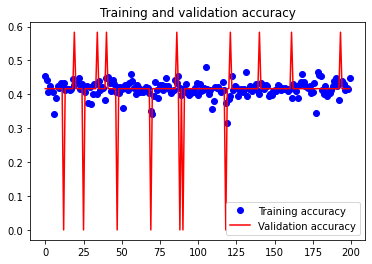

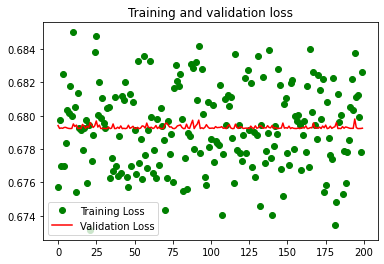

Epoch 1/200
34/34 - 4s - loss: 0.6794 - accuracy: 0.4184 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 113ms/step
Epoch 2/200
34/34 - 4s - loss: 0.6819 - accuracy: 0.4241 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 116ms/step
Epoch 3/200
34/34 - 4s - loss: 0.6786 - accuracy: 0.3611 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 126ms/step
Epoch 4/200
34/34 - 4s - loss: 0.6775 - accuracy: 0.3874 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 126ms/step
Epoch 5/200
34/34 - 4s - loss: 0.6794 - accuracy: 0.4166 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 112ms/step
Epoch 6/200
34/34 - 4s - loss: 0.6813 - accuracy: 0.4219 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 110ms/step
Epoch 7/200
34/34 - 4s - loss: 0.6838 - accuracy: 0.4303 - val_loss: 0.6794 - val_accuracy: 0.4168 - 4s/epoch - 112ms/step
Epoch 8/200
34/34 - 4s - loss: 0.6785 - accuracy: 0.4136 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 112ms/step
Epoch 9/200
34/3

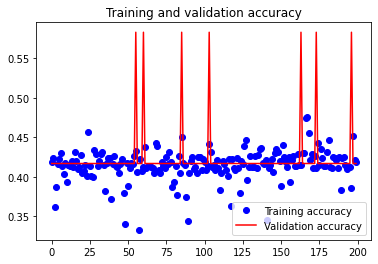

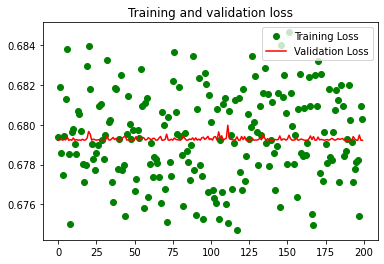

Epoch 1/200
35/35 - 4s - loss: 0.6819 - accuracy: 0.4242 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 113ms/step
Epoch 2/200
35/35 - 4s - loss: 0.6776 - accuracy: 0.4115 - val_loss: 0.6794 - val_accuracy: 0.4168 - 4s/epoch - 114ms/step
Epoch 3/200
35/35 - 4s - loss: 0.6829 - accuracy: 0.4340 - val_loss: 0.6794 - val_accuracy: 0.4168 - 4s/epoch - 119ms/step
Epoch 4/200
35/35 - 4s - loss: 0.6817 - accuracy: 0.4201 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 109ms/step
Epoch 5/200
35/35 - 4s - loss: 0.6806 - accuracy: 0.4200 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 110ms/step
Epoch 6/200
35/35 - 4s - loss: 0.6801 - accuracy: 0.4183 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 115ms/step
Epoch 7/200
35/35 - 4s - loss: 0.6768 - accuracy: 0.4091 - val_loss: 0.6794 - val_accuracy: 0.4168 - 4s/epoch - 118ms/step
Epoch 8/200
35/35 - 4s - loss: 0.6796 - accuracy: 0.4171 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 124ms/step
Epoch 9/200
35/3

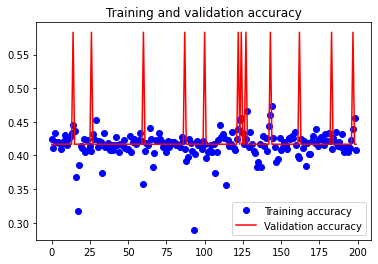

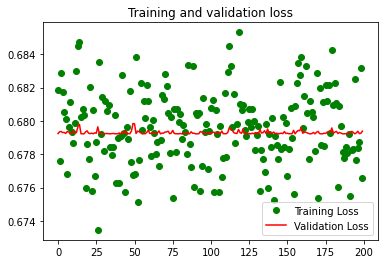

Epoch 1/200
36/36 - 4s - loss: 0.6822 - accuracy: 0.4241 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 110ms/step
Epoch 2/200
36/36 - 4s - loss: 0.6808 - accuracy: 0.4207 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 108ms/step
Epoch 3/200
36/36 - 4s - loss: 0.6786 - accuracy: 0.4145 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 107ms/step
Epoch 4/200
36/36 - 4s - loss: 0.6789 - accuracy: 0.4263 - val_loss: 0.6792 - val_accuracy: 0.5832 - 4s/epoch - 108ms/step
Epoch 5/200
36/36 - 4s - loss: 0.6778 - accuracy: 0.4319 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 108ms/step
Epoch 6/200
36/36 - 4s - loss: 0.6785 - accuracy: 0.4139 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 114ms/step
Epoch 7/200
36/36 - 4s - loss: 0.6819 - accuracy: 0.4297 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 123ms/step
Epoch 8/200
36/36 - 4s - loss: 0.6812 - accuracy: 0.4217 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 118ms/step
Epoch 9/200
36/3

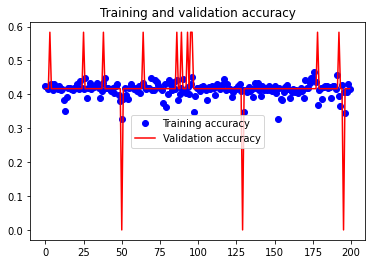

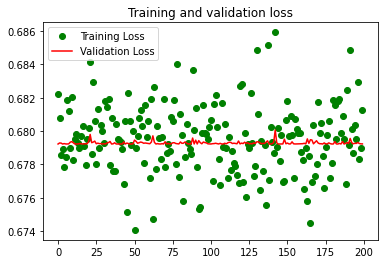

Epoch 1/200
37/37 - 4s - loss: 0.6809 - accuracy: 0.4211 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 112ms/step
Epoch 2/200
37/37 - 4s - loss: 0.6786 - accuracy: 0.4141 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 108ms/step
Epoch 3/200
37/37 - 4s - loss: 0.6818 - accuracy: 0.4092 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 109ms/step
Epoch 4/200
37/37 - 4s - loss: 0.6799 - accuracy: 0.3476 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 109ms/step
Epoch 5/200
37/37 - 4s - loss: 0.6829 - accuracy: 0.4404 - val_loss: 0.6794 - val_accuracy: 0.4168 - 4s/epoch - 111ms/step
Epoch 6/200
37/37 - 4s - loss: 0.6796 - accuracy: 0.3731 - val_loss: 0.6794 - val_accuracy: 0.4168 - 4s/epoch - 115ms/step
Epoch 7/200
37/37 - 4s - loss: 0.6783 - accuracy: 0.4458 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 121ms/step
Epoch 8/200
37/37 - 4s - loss: 0.6771 - accuracy: 0.4103 - val_loss: 0.6795 - val_accuracy: 0.4168 - 4s/epoch - 108ms/step
Epoch 9/200
37/3

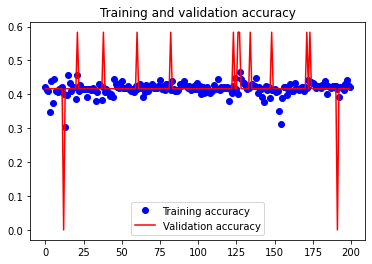

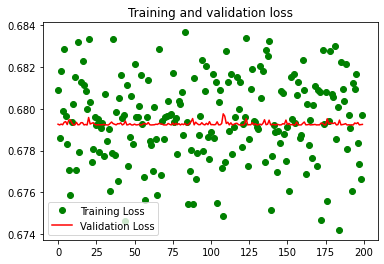

Epoch 1/200
38/38 - 4s - loss: 0.6807 - accuracy: 0.4201 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 109ms/step
Epoch 2/200
38/38 - 4s - loss: 0.6768 - accuracy: 0.4089 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 110ms/step
Epoch 3/200
38/38 - 4s - loss: 0.6770 - accuracy: 0.4453 - val_loss: 0.6794 - val_accuracy: 0.4168 - 4s/epoch - 108ms/step
Epoch 4/200
38/38 - 4s - loss: 0.6764 - accuracy: 0.4121 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 109ms/step
Epoch 5/200
38/38 - 4s - loss: 0.6827 - accuracy: 0.4723 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 106ms/step
Epoch 6/200
38/38 - 4s - loss: 0.6833 - accuracy: 0.4426 - val_loss: 0.6796 - val_accuracy: 0.4168 - 4s/epoch - 110ms/step
Epoch 7/200
38/38 - 4s - loss: 0.6798 - accuracy: 0.4239 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 117ms/step
Epoch 8/200
38/38 - 5s - loss: 0.6797 - accuracy: 0.3853 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 119ms/step
Epoch 9/200
38/3

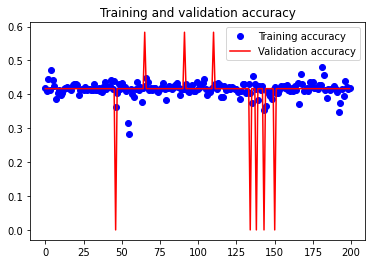

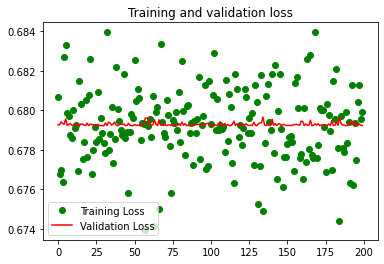

Epoch 1/200
39/39 - 4s - loss: 0.6783 - accuracy: 0.3932 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 114ms/step
Epoch 2/200
39/39 - 4s - loss: 0.6761 - accuracy: 0.3677 - val_loss: 0.6795 - val_accuracy: 0.4168 - 4s/epoch - 109ms/step
Epoch 3/200
39/39 - 4s - loss: 0.6820 - accuracy: 0.4236 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 107ms/step
Epoch 4/200
39/39 - 4s - loss: 0.6780 - accuracy: 0.4196 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 108ms/step
Epoch 5/200
39/39 - 4s - loss: 0.6799 - accuracy: 0.4175 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 110ms/step
Epoch 6/200
39/39 - 5s - loss: 0.6766 - accuracy: 0.4082 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 120ms/step
Epoch 7/200
39/39 - 4s - loss: 0.6807 - accuracy: 0.4201 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 115ms/step
Epoch 8/200
39/39 - 4s - loss: 0.6809 - accuracy: 0.4210 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 106ms/step
Epoch 9/200
39/3

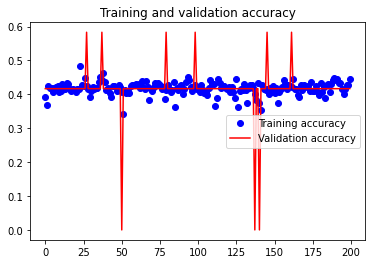

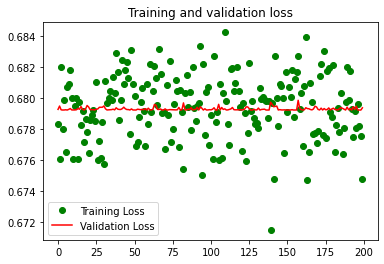

Epoch 1/200
40/40 - 5s - loss: 0.6823 - accuracy: 0.4307 - val_loss: 0.6794 - val_accuracy: 0.4168 - 5s/epoch - 114ms/step
Epoch 2/200
40/40 - 5s - loss: 0.6792 - accuracy: 0.4155 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 122ms/step
Epoch 3/200
40/40 - 4s - loss: 0.6801 - accuracy: 0.4415 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 110ms/step
Epoch 4/200
40/40 - 4s - loss: 0.6804 - accuracy: 0.3964 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 109ms/step
Epoch 5/200
40/40 - 4s - loss: 0.6795 - accuracy: 0.4237 - val_loss: 0.6792 - val_accuracy: 0.5832 - 4s/epoch - 109ms/step
Epoch 6/200
40/40 - 4s - loss: 0.6826 - accuracy: 0.4363 - val_loss: 0.6796 - val_accuracy: 0.4168 - 4s/epoch - 108ms/step
Epoch 7/200
40/40 - 4s - loss: 0.6809 - accuracy: 0.4338 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 108ms/step
Epoch 8/200
40/40 - 4s - loss: 0.6797 - accuracy: 0.4175 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 107ms/step
Epoch 9/200
40/4

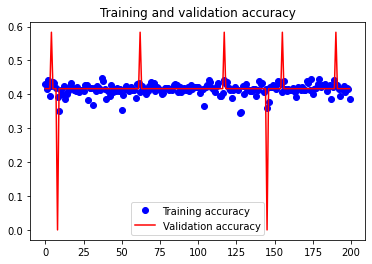

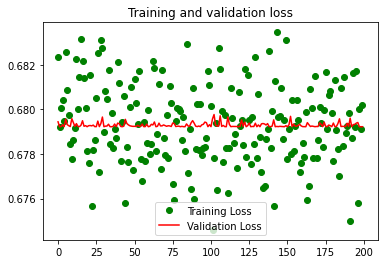

Epoch 1/200
41/41 - 5s - loss: 0.6796 - accuracy: 0.3511 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 113ms/step
Epoch 2/200
41/41 - 4s - loss: 0.6788 - accuracy: 0.4241 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 106ms/step
Epoch 3/200
41/41 - 4s - loss: 0.6792 - accuracy: 0.4157 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 106ms/step
Epoch 4/200
41/41 - 4s - loss: 0.6808 - accuracy: 0.4487 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 105ms/step
Epoch 5/200
41/41 - 4s - loss: 0.6795 - accuracy: 0.4239 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 106ms/step
Epoch 6/200
41/41 - 4s - loss: 0.6801 - accuracy: 0.3787 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 105ms/step
Epoch 7/200
41/41 - 4s - loss: 0.6800 - accuracy: 0.4185 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 109ms/step
Epoch 8/200
41/41 - 5s - loss: 0.6800 - accuracy: 0.4181 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 123ms/step
Epoch 9/200
41/4

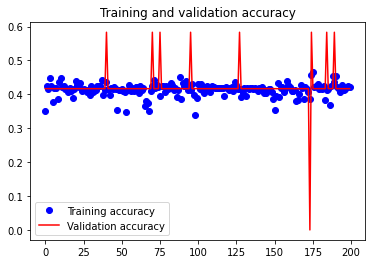

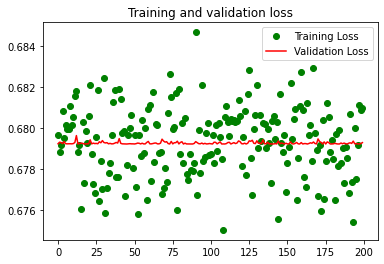

Epoch 1/200
42/42 - 5s - loss: 0.6821 - accuracy: 0.4249 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 107ms/step
Epoch 2/200
42/42 - 4s - loss: 0.6782 - accuracy: 0.4182 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 106ms/step
Epoch 3/200
42/42 - 4s - loss: 0.6800 - accuracy: 0.3479 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 104ms/step
Epoch 4/200
42/42 - 5s - loss: 0.6814 - accuracy: 0.4293 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 121ms/step
Epoch 5/200
42/42 - 5s - loss: 0.6809 - accuracy: 0.4451 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 107ms/step
Epoch 6/200
42/42 - 4s - loss: 0.6780 - accuracy: 0.4514 - val_loss: 0.6795 - val_accuracy: 0.4168 - 4s/epoch - 107ms/step
Epoch 7/200
42/42 - 4s - loss: 0.6782 - accuracy: 0.4167 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 104ms/step
Epoch 8/200
42/42 - 4s - loss: 0.6790 - accuracy: 0.4071 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 105ms/step
Epoch 9/200
42/4

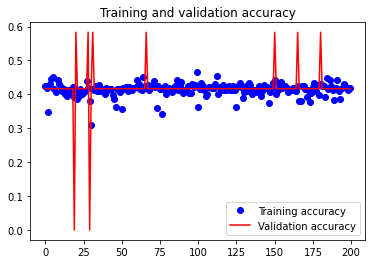

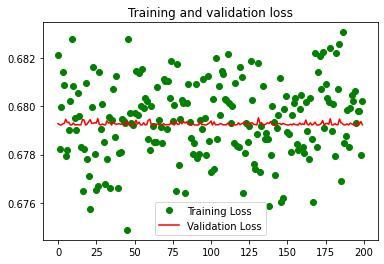

Epoch 1/200
43/43 - 5s - loss: 0.6817 - accuracy: 0.4234 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 108ms/step
Epoch 2/200
43/43 - 5s - loss: 0.6818 - accuracy: 0.4239 - val_loss: 0.6794 - val_accuracy: 0.4168 - 5s/epoch - 116ms/step
Epoch 3/200
43/43 - 5s - loss: 0.6795 - accuracy: 0.4163 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 117ms/step
Epoch 4/200
43/43 - 4s - loss: 0.6802 - accuracy: 0.4187 - val_loss: 0.6792 - val_accuracy: 0.4168 - 4s/epoch - 104ms/step
Epoch 5/200
43/43 - 4s - loss: 0.6824 - accuracy: 0.4258 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 104ms/step
Epoch 6/200
43/43 - 5s - loss: 0.6814 - accuracy: 0.4229 - val_loss: 0.6796 - val_accuracy: 0.4168 - 5s/epoch - 107ms/step
Epoch 7/200
43/43 - 4s - loss: 0.6792 - accuracy: 0.4164 - val_loss: 0.6792 - val_accuracy: 0.5832 - 4s/epoch - 104ms/step
Epoch 8/200
43/43 - 5s - loss: 0.6803 - accuracy: 0.4312 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 105ms/step
Epoch 9/200
43/4

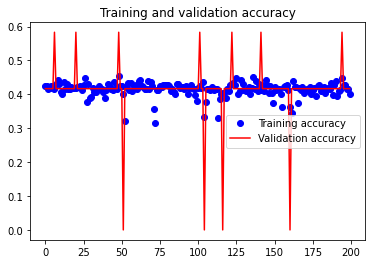

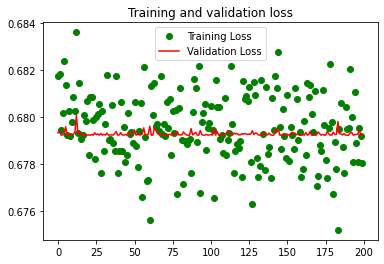

Epoch 1/200
44/44 - 5s - loss: 0.6806 - accuracy: 0.3935 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 105ms/step
Epoch 2/200
44/44 - 5s - loss: 0.6808 - accuracy: 0.4385 - val_loss: 0.6794 - val_accuracy: 0.4168 - 5s/epoch - 106ms/step
Epoch 3/200
44/44 - 5s - loss: 0.6785 - accuracy: 0.4265 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 103ms/step
Epoch 4/200
44/44 - 4s - loss: 0.6782 - accuracy: 0.4275 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 102ms/step
Epoch 5/200
44/44 - 5s - loss: 0.6787 - accuracy: 0.4444 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 108ms/step
Epoch 6/200
44/44 - 5s - loss: 0.6785 - accuracy: 0.4238 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 117ms/step
Epoch 7/200
44/44 - 4s - loss: 0.6792 - accuracy: 0.4169 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 101ms/step
Epoch 8/200
44/44 - 4s - loss: 0.6751 - accuracy: 0.4109 - val_loss: 0.6793 - val_accuracy: 0.4168 - 4s/epoch - 102ms/step
Epoch 9/200
44/4

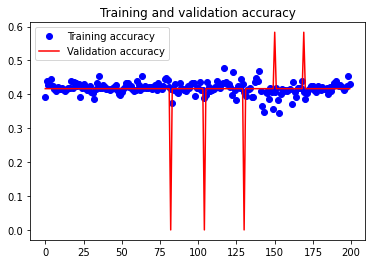

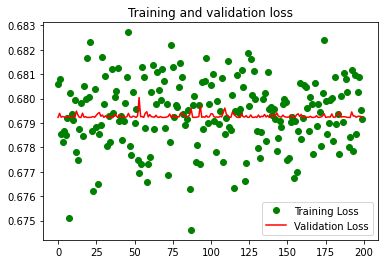

Epoch 1/200
45/45 - 5s - loss: 0.6776 - accuracy: 0.4318 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 104ms/step
Epoch 2/200
45/45 - 5s - loss: 0.6779 - accuracy: 0.4291 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 106ms/step
Epoch 3/200
45/45 - 5s - loss: 0.6790 - accuracy: 0.4188 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 103ms/step
Epoch 4/200
45/45 - 5s - loss: 0.6788 - accuracy: 0.4053 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 103ms/step
Epoch 5/200
45/45 - 5s - loss: 0.6785 - accuracy: 0.3959 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 108ms/step
Epoch 6/200
45/45 - 5s - loss: 0.6795 - accuracy: 0.4170 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 115ms/step
Epoch 7/200
45/45 - 5s - loss: 0.6799 - accuracy: 0.4179 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 106ms/step
Epoch 8/200
45/45 - 5s - loss: 0.6785 - accuracy: 0.4134 - val_loss: 0.6792 - val_accuracy: 0.5832 - 5s/epoch - 102ms/step
Epoch 9/200
45/4

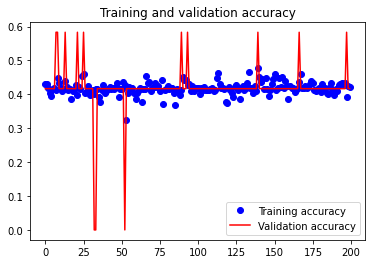

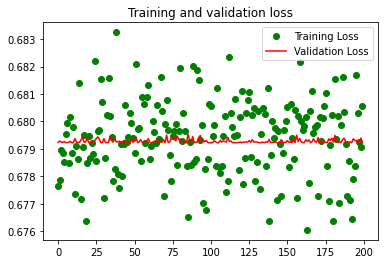

Epoch 1/200
46/46 - 5s - loss: 0.6786 - accuracy: 0.4070 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 107ms/step
Epoch 2/200
46/46 - 5s - loss: 0.6809 - accuracy: 0.4210 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 103ms/step
Epoch 3/200
46/46 - 5s - loss: 0.6802 - accuracy: 0.4188 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 102ms/step
Epoch 4/200
46/46 - 6s - loss: 0.6811 - accuracy: 0.4217 - val_loss: 0.6794 - val_accuracy: 0.4168 - 6s/epoch - 122ms/step
Epoch 5/200
46/46 - 5s - loss: 0.6791 - accuracy: 0.4191 - val_loss: 0.6794 - val_accuracy: 0.4168 - 5s/epoch - 102ms/step
Epoch 6/200
46/46 - 5s - loss: 0.6807 - accuracy: 0.4025 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 102ms/step
Epoch 7/200
46/46 - 5s - loss: 0.6794 - accuracy: 0.3964 - val_loss: 0.6792 - val_accuracy: 0.5832 - 5s/epoch - 101ms/step
Epoch 8/200
46/46 - 5s - loss: 0.6798 - accuracy: 0.4291 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 105ms/step
Epoch 9/200
46/4

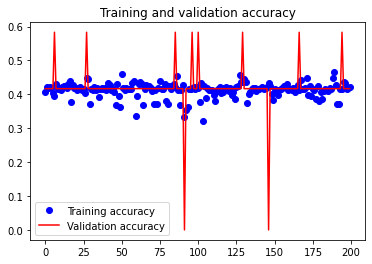

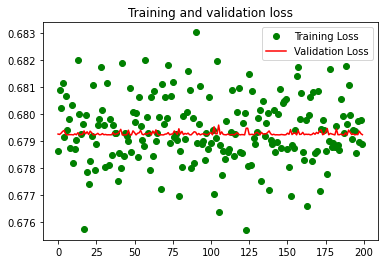

Epoch 1/200
47/47 - 5s - loss: 0.6796 - accuracy: 0.4094 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 109ms/step
Epoch 2/200
47/47 - 5s - loss: 0.6798 - accuracy: 0.4175 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 101ms/step
Epoch 3/200
47/47 - 5s - loss: 0.6792 - accuracy: 0.4175 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 101ms/step
Epoch 4/200
47/47 - 5s - loss: 0.6795 - accuracy: 0.4167 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 100ms/step
Epoch 5/200
47/47 - 5s - loss: 0.6785 - accuracy: 0.4171 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 99ms/step
Epoch 6/200
47/47 - 5s - loss: 0.6787 - accuracy: 0.4141 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 102ms/step
Epoch 7/200
47/47 - 5s - loss: 0.6801 - accuracy: 0.4184 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 109ms/step
Epoch 8/200
47/47 - 5s - loss: 0.6802 - accuracy: 0.3806 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 111ms/step
Epoch 9/200
47/47

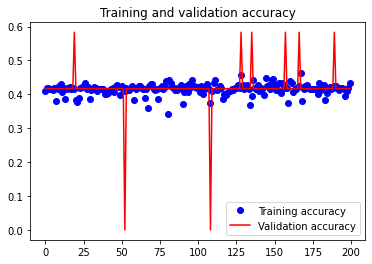

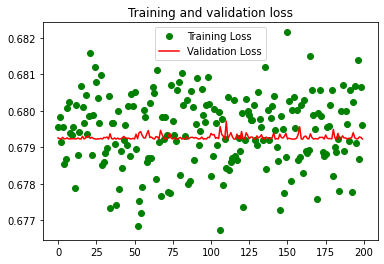

Epoch 1/200
48/48 - 5s - loss: 0.6804 - accuracy: 0.4466 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 109ms/step
Epoch 2/200
48/48 - 5s - loss: 0.6816 - accuracy: 0.4357 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 103ms/step
Epoch 3/200
48/48 - 5s - loss: 0.6801 - accuracy: 0.4260 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 101ms/step
Epoch 4/200
48/48 - 5s - loss: 0.6802 - accuracy: 0.4188 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 100ms/step
Epoch 5/200
48/48 - 5s - loss: 0.6795 - accuracy: 0.4167 - val_loss: 0.6792 - val_accuracy: 0.5832 - 5s/epoch - 104ms/step
Epoch 6/200
48/48 - 5s - loss: 0.6787 - accuracy: 0.4323 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 103ms/step
Epoch 7/200
48/48 - 6s - loss: 0.6805 - accuracy: 0.4197 - val_loss: 0.6792 - val_accuracy: 0.4168 - 6s/epoch - 116ms/step
Epoch 8/200
48/48 - 5s - loss: 0.6802 - accuracy: 0.4239 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 100ms/step
Epoch 9/200
48/4

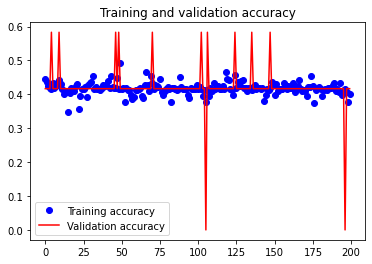

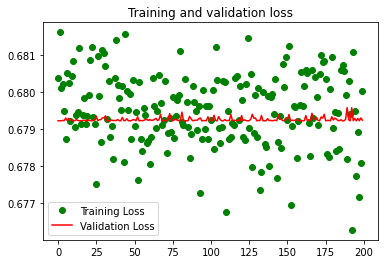

Epoch 1/200
49/49 - 5s - loss: 0.6805 - accuracy: 0.3884 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 103ms/step
Epoch 2/200
49/49 - 5s - loss: 0.6796 - accuracy: 0.4287 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 107ms/step
Epoch 3/200
49/49 - 6s - loss: 0.6806 - accuracy: 0.4205 - val_loss: 0.6792 - val_accuracy: 0.4168 - 6s/epoch - 116ms/step
Epoch 4/200
49/49 - 5s - loss: 0.6789 - accuracy: 0.4156 - val_loss: 0.6794 - val_accuracy: 0.4168 - 5s/epoch - 106ms/step
Epoch 5/200
49/49 - 5s - loss: 0.6800 - accuracy: 0.4246 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 99ms/step
Epoch 6/200
49/49 - 5s - loss: 0.6790 - accuracy: 0.4172 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 102ms/step
Epoch 7/200
49/49 - 5s - loss: 0.6788 - accuracy: 0.4147 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 103ms/step
Epoch 8/200
49/49 - 5s - loss: 0.6800 - accuracy: 0.4114 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 103ms/step
Epoch 9/200
49/49

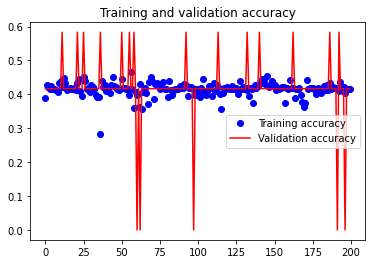

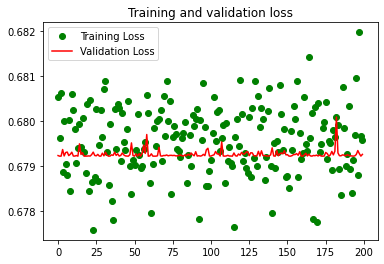

Epoch 1/200
50/50 - 5s - loss: 0.6793 - accuracy: 0.4161 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 110ms/step
Epoch 2/200
50/50 - 5s - loss: 0.6791 - accuracy: 0.4153 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 100ms/step
Epoch 3/200
50/50 - 5s - loss: 0.6787 - accuracy: 0.3838 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 101ms/step
Epoch 4/200
50/50 - 5s - loss: 0.6788 - accuracy: 0.4483 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 102ms/step
Epoch 5/200
50/50 - 5s - loss: 0.6814 - accuracy: 0.4221 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 99ms/step
Epoch 6/200
50/50 - 5s - loss: 0.6807 - accuracy: 0.4205 - val_loss: 0.6795 - val_accuracy: 0.4168 - 5s/epoch - 101ms/step
Epoch 7/200
50/50 - 6s - loss: 0.6807 - accuracy: 0.4201 - val_loss: 0.6792 - val_accuracy: 0.4168 - 6s/epoch - 117ms/step
Epoch 8/200
50/50 - 5s - loss: 0.6803 - accuracy: 0.4241 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 101ms/step
Epoch 9/200
50/50

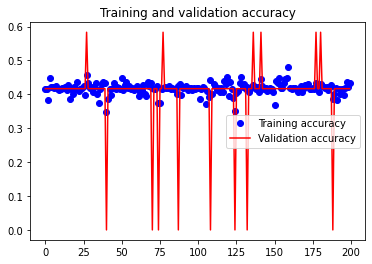

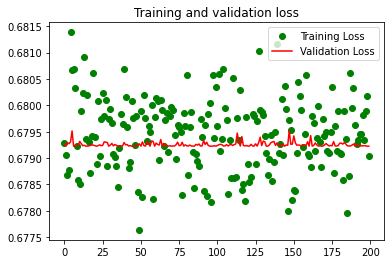

Epoch 1/200
51/51 - 5s - loss: 0.6793 - accuracy: 0.4173 - val_loss: 0.6794 - val_accuracy: 0.4168 - 5s/epoch - 105ms/step
Epoch 2/200
51/51 - 5s - loss: 0.6793 - accuracy: 0.4161 - val_loss: 0.6793 - val_accuracy: 0.4168 - 5s/epoch - 99ms/step
Epoch 3/200
51/51 - 6s - loss: 0.6793 - accuracy: 0.4059 - val_loss: 0.6792 - val_accuracy: 0.4168 - 6s/epoch - 111ms/step
Epoch 4/200
51/51 - 5s - loss: 0.6803 - accuracy: 0.4177 - val_loss: 0.6793 - val_accuracy: 0.5832 - 5s/epoch - 97ms/step
Epoch 5/200
51/51 - 5s - loss: 0.6793 - accuracy: 0.4474 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 97ms/step
Epoch 6/200
51/51 - 5s - loss: 0.6799 - accuracy: 0.4181 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 98ms/step
Epoch 7/200
51/51 - 5s - loss: 0.6796 - accuracy: 0.4169 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 98ms/step
Epoch 8/200
51/51 - 5s - loss: 0.6794 - accuracy: 0.4165 - val_loss: 0.6792 - val_accuracy: 0.4168 - 5s/epoch - 100ms/step
Epoch 9/200
51/51 - 5

In [ ]:
#training
import matplotlib.pyplot as plt
from callee import *
import traceback
import pandas as pd
import os
from tensorflow.python.keras.models import load_model

try_t=0 ;steps_per_epoch_n=30; epochs_n=200;batch_size_n=40;
tmp_ep=0.0

res_dir="/content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/result/"
#
while(True):
  try:
    #steps_per_epoch=10; epochs=100;batch_size=10;

    history=model.fit(train_generator,validation_data=validation_generator, steps_per_epoch=steps_per_epoch_n, epochs=epochs_n,batch_size=batch_size_n,
    verbose=2,shuffle=True )#validation_steps=20,
    
    batch_size=batch_size_n;steps_per_epoch=steps_per_epoch_n
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
    print(epochs)
    tmp_ep=(sum(acc)/len(acc))
    
    if (try_t==0 or (sum(acc)/len(acc))>=tmp_ep):
      steps_per_epoch_n=steps_per_epoch_n+1;
      tmp_ep=(sum(acc)/len(acc))
      save_res(try_t,epochs,batch_size,steps_per_epoch,tmp_ep,Train_list,Validation_list)
    elif((sum(acc)/len(acc))>=tmp_ep):
      batch_size_n=batch_size_n+1;
      #모델 저장하기#결과 값 지니고 있음
      model.save(res_dir+'mnist_mlp_model.h5')
      save_res(try_t,epochs,batch_size,steps_per_epoch,tmp_ep,Train_list,Validation_list)
      #model res import 
      tmpload_md=tf.keras.models.load_model(res_dir+'mnist_mlp_model.h5')
      #test_loss, test_acc = tmpload_md.evaluate(train_generator,validation_data=validation_generator, verbose=2)#train_generator,validation_data=validation_generator, //x,  y,
    try_t=try_t+1;
    
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs,val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'go', label='Training Loss')
    plt.plot(epochs,val_loss, 'r', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
  except Exception as em:
    print(em,"// error")
    continue
                    #spe<ep&spe==vs

In [ ]:
import pandas as pd
import os
#결과 저장하기 -- 높은 acc를 위해서
#print("train_dir : ",train_dir); #print("os.listdir : ",nm_list) #train_dir :  /content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/train/  # os.listdir :  ['31-1_0.4x_47.jpg',
#print(history.history.keys())
base_dir="/content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/"
res_dir="/content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/result/"

train_img = os.path.join(base_dir,'train')
validation_img = os.path.join(base_dir,'validation')

tm_list=os.listdir(tumor_dir)
vm_list=os.listdir(normal_dir)

Train_list,Validation_list=list(),list()
tmp_num01=0
#/content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/validation/tumor_validation/ 

def save_res(try_t,epochs,batch_size,steps_per_epoch,Accuracy,Train_list,Validation_list):
#model check
  Train_list,Validation_list=list(),list()
  global tmp_num01
  loss_metrics=model.evaluate(test_generator,verbose=2)#,train_generator,
  index_n=["TRY_t","Epochs","Batch_size","Steps_per_epoch","Loss","Accuracy","File_list"]#index_n=list()
  print("index_n",len(index_n))
  
  value_d=list()
  fres=open(res_dir+"Learnigrc.csv","a")
  #dfv=pd.DataFrame();dft=pd.DataFrame()
  for (path, dir, file) in os.walk(base_dir):
    print(path);print("dir::",dir)
    if(path[-11:]=="validation"):
          print("validation ::")
          value_d=[str(try_t)+" validation",epochs,batch_size,steps_per_epoch,loss_metrics[0],loss_metrics[1],vm_list]
          dfv=pd.DataFrame([value_d],columns=[index_n])
          print("validation //",dfv)
          if(tmp_num01==0):
            dfv.to_csv(fres,header=True,mode ="a",index=None)
            tmp_num01=1
          else: 
            dfv.to_csv(fres,header=False,mode ="a")
    elif(path[-5:]=="train"):
          print("train ::")
          value_d=[str(try_t)+" train",epochs,batch_size,steps_per_epoch,loss_metrics[0],loss_metrics[1],tm_list]
          dft=pd.DataFrame([value_d],columns=[index_n])
          print("train //",dft)
          if(tmp_num01==0):
            dft.to_csv(fres,header=False,mode ="a",index=None)
            tmp_num01=1
          else: 
            dft.to_csv(fres,header=False,mode ="a")
  # pd.merge(dft,dfv,how='outer')
  # dfv.to_csv(fres,header=False,mode ="a")
    #fres.close()

In [ ]:
!pip install callee
#for excuse error
#https://jsp-dev.tistory.com/entry/Python-Exception-%EB%B0%9C%EC%83%9D%EC%8B%9C-%ED%95%B4%EB%8B%B9-%EC%86%8C%EC%8A%A4-%EB%9D%BC%EC%9D%B8-%EC%B6%9C%EB%A0%A5%ED%95%98%EA%B8%B0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for callee: filename=callee-0.3.1-py3-none-any.whl size=23341 sha256=9ba7eeebed09b95c20b4984132abdd5d95d7e34e8b9ec020179e9be3bf956848
  Stored in directory: /root/.cache/pip/wheels/d5/98/06/ba49c74b8dac4d96cde6d7108dfb2ba33bd12d2bbcf269c77a
Successfully built callee


#안쓰는 부분
https://www.tensorflow.org/guide/keras/train_and_evaluate?hl=ko
https://ko.code-paper.com/q/43286-how-to-evaluate-model-while-the-data-splitted-manually-in-deep-learning

In [ ]:
#model check
loss_metrics=model.evaluate(test_generator,verbose=2)#,train_generator,
#validation_data=
print("#### Test Result ####\n")
# print('loss : ',str(loss_metrics[0]))
# print('Accuracy : ',str(loss_metrics[1]))
print('tt : ',loss_metrics) #18/18 - 5s - loss: 0.6808 - accuracy: 0.5832 - 5s/epoch - 284ms/step
#tt :  [0.6808080077171326, 0.5832363367080688]
print('loss : ',loss_metrics[0])
print('Accuracy : ',str(loss_metrics[1]))


#모델 저장하기#결과 값 지니고 있음
# res_dir="/content/gdrive/MyDrive/MPbio_GD/ProG/TIPS/OWN/DeepL/result/"
# model.save(res_dir+'mnist_mlp_model.h5')

# #model res import 
# from tensorflow.python.keras.models import load_model
# tmpload_md=tf.keras.models.load_model(res_dir+'mnist_mlp_model.h5')
# test_loss, test_acc = tmpload_md.evaluate(train_generator,validation_data=validation_generator, verbose=2)#train_generator,validation_data=validation_generator, //x,  y,

18/18 - 5s - loss: 0.6808 - accuracy: 0.5832 - 5s/epoch - 274ms/step
#### Test Result ####

tt :  [0.680807888507843, 0.5832363367080688]
loss :  0.680807888507843
Accuracy :  0.5832363367080688


In [ ]:
# # tumor_img : 2507
# print(2507*0.6)#8,5,1,0
# # normal_img : 1790
# print(1790*0.6)#8,5,1,0,9

# # tumor_img : 2507
# print(2507*0.2)#
# # normal_img : 1790
# print(1790*0.2)#5time?

In [ ]:
# def test1(z,b):
#   global a
#   a=10
  
# def test2(c,x):
#   global d
#   test1(c,x)
#   a=a+1
#   print("a",a)
#   d=22

# e,f=0,0
# test2(e,f)


In [ ]:
#print(len("validation"),"+",path)
#print("ACC avg","/",acc)

ACC avg / <class 'float'> [0.5720000267028809, 0.5857740640640259, 0.6060000061988831, 0.5680000185966492, 0.6060000061988831, 0.5559999942779541, 0.5600000023841858, 0.5839999914169312, 0.5899999737739563, 0.5794979333877563, 0.6192468404769897, 0.5878661274909973, 0.5669456124305725, 0.5600000023841858, 0.5979999899864197, 0.6119999885559082, 0.5523012280464172, 0.5759999752044678, 0.5740000009536743, 0.5860000252723694, 0.5879999995231628, 0.6129707098007202, 0.5585774183273315, 0.5627614855766296, 0.5820000171661377, 0.5774058699607849, 0.5580000281333923, 0.5860000252723694, 0.5920000076293945, 0.5619999766349792, 0.5659999847412109, 0.5720000267028809, 0.5759999752044678, 0.5860000252723694, 0.6066945791244507, 0.5460000038146973, 0.578000009059906, 0.5879999995231628, 0.6019999980926514, 0.5540000200271606, 0.5740000009536743, 0.5799999833106995, 0.5820000171661377, 0.5799999833106995, 0.5680000185966492, 0.621999979019165, 0.5839999914169312, 0.5600000023841858, 0.6046025156974